### Case Study on Probability for Data Science

Problem Statement:
    
    To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
    (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
    Also, if some data pre-processing is necessary do that as well.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data into python environment

data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Checking for null values

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

    There are no null values in the data set

### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

    The data is categorical so we will use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number. 


In [5]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


    Label encoding converts all categorical data into numeric type

In [7]:
for column in data.columns:
    print(data[column].value_counts())

0    4208
1    3916
Name: class, dtype: int64
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64
0    4748
1    3376
Name: bruises, dtype: int64
5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64
1    7914
0     210
Name: gill-attachment, dtype: int64
0    6812
1    1312
Name: gill-spacing, dtype: int64
0    5612
1    2512
Name: gill-size, dtype: int64
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64
1    4608
0    3516
Name: stalk-shape, dtype: int64
1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64
2    5176
1    2372
0     552
3      24
Name

       From the above figure we can see that veil-type has only one unique value and hence won't contribute anything to the data. So we can safely remove it.

In [8]:
data = data.drop(["veil-type"],axis=1)

In [9]:
data.shape

(8124, 22)

In [10]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
# Using value_counts() method we can see that the dataset is balanced

data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [12]:
# Preparing into features and target

x=data.iloc[:,1:].values 
y=data.iloc[:,0].values   #target variable

In [13]:
x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
#Splitting dataset into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Classification Methods

We will use following classifiers to make the prediction:-

    1) Logistic Regression
    2) KNN Classifier
    3) SVM
    4) Decision Tree
    5) Random Forest Classifier
    6) Naive Bayes


##### 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 94.73%


##### 2. KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

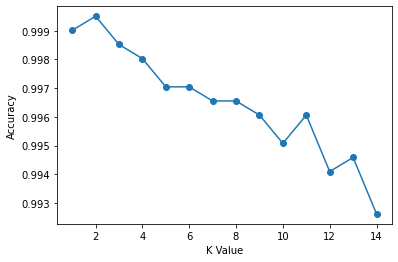

In [18]:
# Plotting to see best K value

plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [19]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Test Accuracy: {}%".format(round(classifier.score(x_test,y_test)*100,2)))

Test Accuracy: 99.95%


##### 3. SVM Classifier

In [20]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


##### 4. Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


##### 5. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


##### 6. Naive Bayes Classifier

  ##### a. Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 91.43%


In [24]:
#Prediction of the test set result

y_pred=nb.predict(x_test)

In [25]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[966,  95],
       [ 79, 891]], dtype=int64)

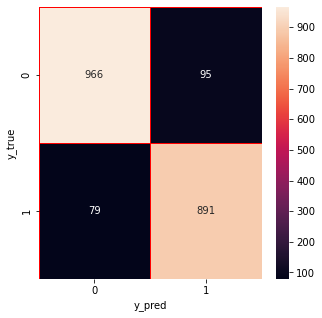

In [26]:
# Plotting confusion matrix

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### b. Bernoulli Naive Bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
bnb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(bnb.score(x_test,y_test)*100,2)))

Test Accuracy: 84.05%


In [28]:
#Prediction of the test set result

y_pred=bnb.predict(x_test)

In [29]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1011,   50],
       [ 274,  696]], dtype=int64)

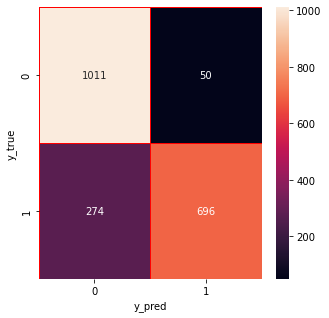

In [30]:
# Plotting confusion matrix

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### Insight:

    1. Most of classfication methods hit 100% accuracy with this dataset.
    2. Gaussian Naive Bayes Classifier does better prediction than Bernoulli Naive Bayes Classifier
